In [5]:
pip install pystan

  Using cached pystan-3.9.1-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45.3 MB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached marshmallow-3.21.3-py3-none-any.whl (49 kB)
  Using cached webargs-8.4.0-py3-none-any.whl (31 kB)


In [6]:
pip install prophet

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Crimes_-_2001_to_Present.csv')
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021.0,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021.0,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023.0,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023.0,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229823,1382976,G093730,02/15/2001 09:00:00 AM,001XX W MONROE ST,0820,THEFT,$500 AND UNDER,BANK,False,False,...,NaN,NaN,06,1175455.0,1899856.0,2001.0,08/17/2015 03:03:40 PM,41.880581,-87.631203,"(41.880581487, -87.631202689)"
229824,1345055,G045325,01/22/2001 01:30:00 PM,002XX S WABASH AV,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,True,False,...,NaN,NaN,11,1176881.0,1899459.0,2001.0,08/17/2015 03:03:40 PM,41.879460,-87.625979,"(41.879459964, -87.625978623)"
229825,1439143,G146911,03/14/2001 04:15:00 PM,041XX W 13 ST,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE PORCH/HALLWAY,True,False,...,NaN,NaN,18,1148730.0,1893752.0,2001.0,08/17/2015 03:03:40 PM,41.864389,-87.729492,"(41.864389451, -87.729492493)"
229826,1413733,G132622,03/07/2001 07:30:00 PM,023XX W GIDDINGS ST,0560,ASSAULT,SIMPLE,ALLEY,False,False,...,NaN,NaN,08A,1160161.0,1931534.0,2001.0,08/17/2015 03:03:40 PM,41.967838,-87.686483,"(41.967837743, -87.686483278)"


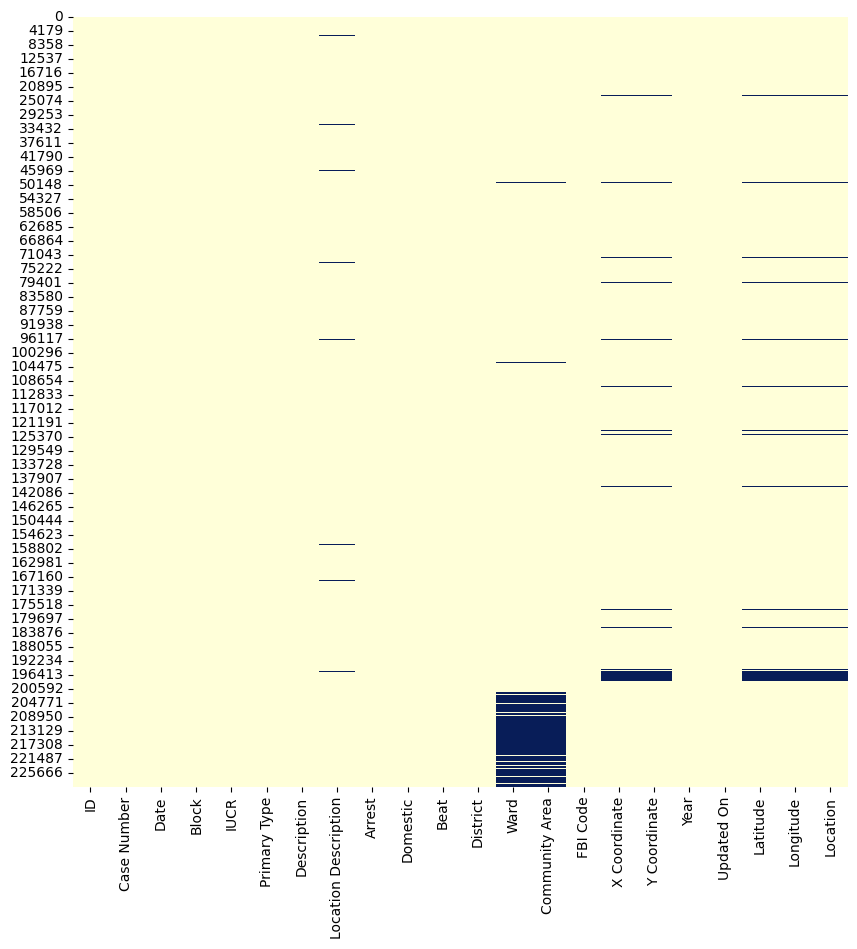

In [12]:
#Let's check for the null values
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.show()

In [13]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [15]:
#Drop the columns that we are not going to use from the dataset
data.drop(['ID','Case Number','IUCR','X Coordinate', 'Y Coordinate','Updated On', 'Latitude',
       'Longitude','Location','FBI Code','Ward','Year','Community Area','District','Beat'],axis=1,inplace=True)

In [16]:
data

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False
1,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False
3,11/09/2023 07:30:00 AM,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
4,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False
...,...,...,...,...,...,...,...
229823,02/15/2001 09:00:00 AM,001XX W MONROE ST,THEFT,$500 AND UNDER,BANK,False,False
229824,01/22/2001 01:30:00 PM,002XX S WABASH AV,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,True,False
229825,03/14/2001 04:15:00 PM,041XX W 13 ST,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE PORCH/HALLWAY,True,False
229826,03/07/2001 07:30:00 PM,023XX W GIDDINGS ST,ASSAULT,SIMPLE,ALLEY,False,False


In [18]:
#Check each column datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229828 entries, 0 to 229827
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Date                  229828 non-null  object
 1   Block                 229828 non-null  object
 2   Primary Type          229828 non-null  object
 3   Description           229827 non-null  object
 4   Location Description  228155 non-null  object
 5   Arrest                229827 non-null  object
 6   Domestic              229827 non-null  object
dtypes: object(7)
memory usage: 12.3+ MB


In [19]:
#changing datetime type
data['Date'] = pd.to_datetime(data.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229828 entries, 0 to 229827
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  229828 non-null  datetime64[ns]
 1   Block                 229828 non-null  object        
 2   Primary Type          229828 non-null  object        
 3   Description           229827 non-null  object        
 4   Location Description  228155 non-null  object        
 5   Arrest                229827 non-null  object        
 6   Domestic              229827 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 12.3+ MB


In [21]:
data['Primary Type'].value_counts()

Primary Type
THEFT                                50198
BATTERY                              39310
CRIMINAL DAMAGE                      24224
MOTOR VEHICLE THEFT                  19750
ASSAULT                              19408
DECEPTIVE PRACTICE                   15432
OTHER OFFENSE                        14649
ROBBERY                               9518
NARCOTICS                             7746
BURGLARY                              7246
WEAPONS VIOLATION                     6005
CRIMINAL TRESPASS                     4337
HOMICIDE                              3099
OFFENSE INVOLVING CHILDREN            2285
CRIMINAL SEXUAL ASSAULT               1664
SEX OFFENSE                           1481
PUBLIC PEACE VIOLATION                 790
INTERFERENCE WITH PUBLIC OFFICER       483
PROSTITUTION                           459
ARSON                                  454
STALKING                               400
LIQUOR LAW VIOLATION                   217
INTIMIDATION                           15

In [22]:
# top 15 crimes.
order_data = data['Primary Type'].value_counts().iloc[:15].index
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'ASSAULT',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'ROBBERY', 'NARCOTICS',
       'BURGLARY', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'HOMICIDE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL SEXUAL ASSAULT'],
      dtype='object', name='Primary Type')

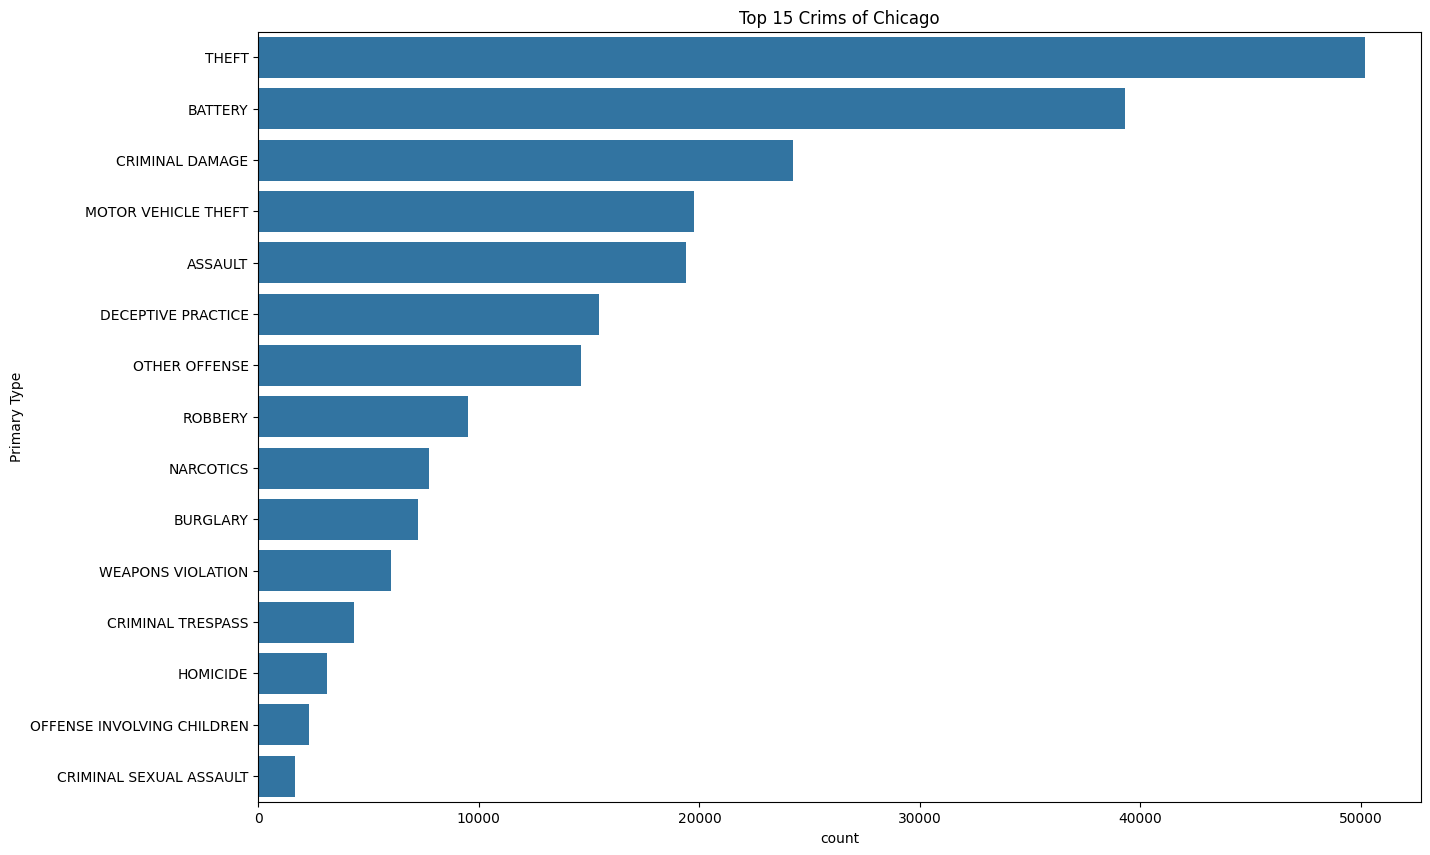

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=data,order=order_data)
plt.title('Top 15 Crims of Chicago')
plt.show()

In [24]:
order_for_location = data['Location Description'].value_counts().iloc[:15].index
order_for_location

Index(['STREET', 'APARTMENT', 'RESIDENCE', 'SIDEWALK', 'SMALL RETAIL STORE',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'ALLEY', 'RESTAURANT',
       'DEPARTMENT STORE', 'COMMERCIAL / BUSINESS OFFICE', 'OTHER (SPECIFY)',
       'VEHICLE NON-COMMERCIAL', 'GAS STATION', 'GROCERY FOOD STORE',
       'RESIDENCE - PORCH / HALLWAY'],
      dtype='object', name='Location Description')

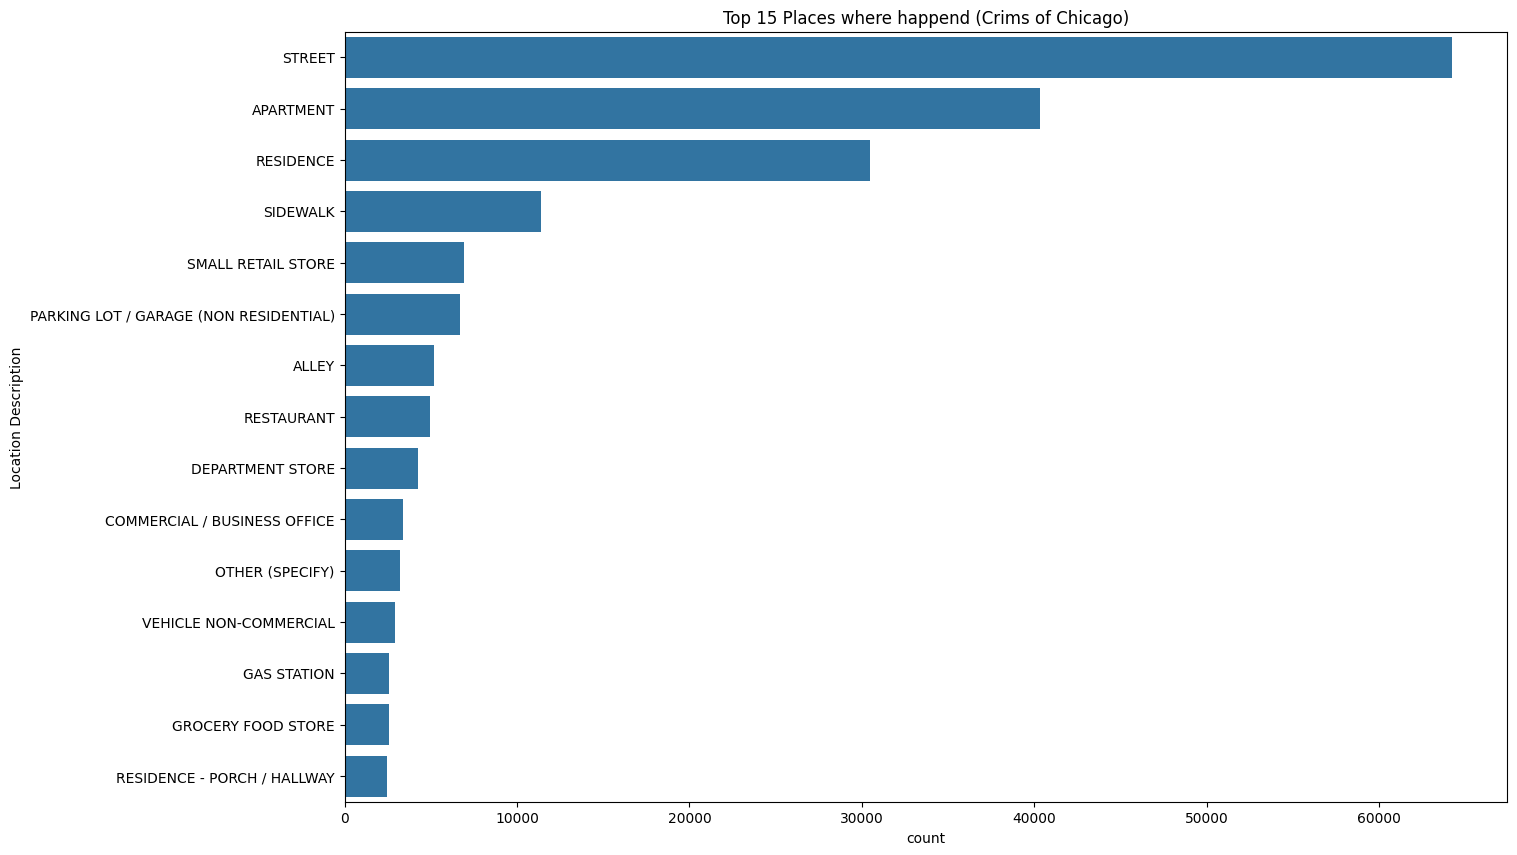

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=data,order=order_for_location)
plt.title('Top 15 Places where happend (Crims of Chicago)')
plt.show()

In [26]:
data.set_index('Date',inplace=True)

In [27]:
data

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2007-08-25 09:22:18,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False
2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False
2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False
...,...,...,...,...,...,...
2001-02-15 09:00:00,001XX W MONROE ST,THEFT,$500 AND UNDER,BANK,False,False
2001-01-22 13:30:00,002XX S WABASH AV,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,True,False
2001-03-14 16:15:00,041XX W 13 ST,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE PORCH/HALLWAY,True,False


In [28]:
# find the rate per year
temp = data.resample('Y').size()
temp

Date
2001-12-31     26382
2002-12-31       496
2003-12-31       479
2004-12-31       376
2005-12-31       393
2006-12-31       384
2007-12-31       381
2008-12-31       460
2009-12-31       457
2010-12-31       367
2011-12-31       331
2012-12-31       352
2013-12-31       368
2014-12-31       367
2015-12-31       428
2016-12-31       517
2017-12-31       560
2018-12-31       671
2019-12-31       611
2020-12-31      1107
2021-12-31      1445
2022-12-31      3735
2023-12-31     88838
2024-12-31    100323
Freq: A-DEC, dtype: int64

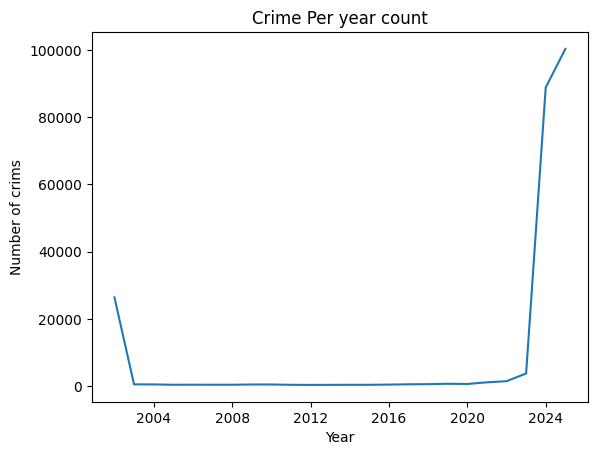

In [29]:
plt.plot(temp)
plt.title('Crime Per year count')
plt.xlabel('Year')
plt.ylabel('Number of crims')
plt.show()

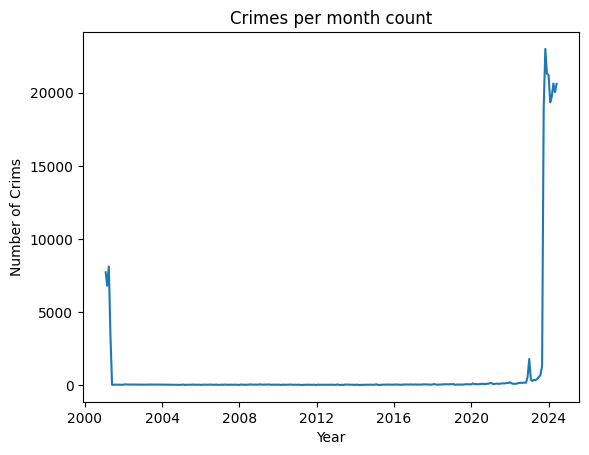

In [30]:
plt.plot(data.resample('M').size())
plt.title('Crimes per month count')
plt.xlabel('Year')
plt.ylabel('Number of Crims')
plt.show()

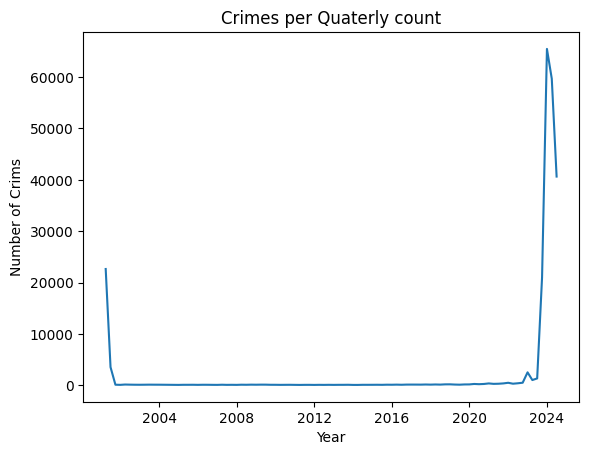

In [31]:
plt.plot(data.resample('Q').size())
plt.title('Crimes per Quaterly count')
plt.xlabel('Year')
plt.ylabel('Number of Crims')
plt.show()

In [32]:
chicago_prohet = data.resample('M').size().reset_index()
chicago_prohet

,Date,0
0,2001-01-31,7723
1,2001-02-28,6805
2,2001-03-31,8115
3,2001-04-30,3480
4,2001-05-31,30
...,...,...
276,2024-01-31,19346
277,2024-02-29,19714
278,2024-03-31,20626
279,2024-04-30,20031


In [33]:
chicago_prohet.columns = ['Date','CrimeCount']
chicago_prohet

,Date,CrimeCount
0,2001-01-31,7723
1,2001-02-28,6805
2,2001-03-31,8115
3,2001-04-30,3480
4,2001-05-31,30
...,...,...
276,2024-01-31,19346
277,2024-02-29,19714
278,2024-03-31,20626
279,2024-04-30,20031


In [34]:
chicago_prohet_data = chicago_prohet.rename(columns={'Date':'ds','CrimeCount':'y'})
chicago_prohet_data

,ds,y
0,2001-01-31,7723
1,2001-02-28,6805
2,2001-03-31,8115
3,2001-04-30,3480
4,2001-05-31,30
...,...,...
276,2024-01-31,19346
277,2024-02-29,19714
278,2024-03-31,20626
279,2024-04-30,20031


In [35]:
m = Prophet()
m.fit(chicago_prohet_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpajm5o8r_/yg7n2kak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpajm5o8r_/z0jsg01e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17786', 'data', 'file=/tmp/tmpajm5o8r_/yg7n2kak.json', 'init=/tmp/tmpajm5o8r_/z0jsg01e.json', 'output', 'file=/tmp/tmpajm5o8r_/prophet_modela8azvo_l/prophet_model-20240612045218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:52:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:52:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
#Make Predictions
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,570.383719,-3227.231472,4377.659635,570.383719,570.383719,89.520143,89.520143,89.520143,89.520143,89.520143,89.520143,0.0,0.0,0.0,659.903862
1,2001-02-28,566.085521,-3014.986054,4849.394899,566.085521,566.085521,312.722128,312.722128,312.722128,312.722128,312.722128,312.722128,0.0,0.0,0.0,878.807649
2,2001-03-31,561.326801,-2839.614693,4799.652487,561.326801,561.326801,325.082423,325.082423,325.082423,325.082423,325.082423,325.082423,0.0,0.0,0.0,886.409224
3,2001-04-30,556.721589,-3315.314219,4870.049595,556.721589,556.721589,46.641389,46.641389,46.641389,46.641389,46.641389,46.641389,0.0,0.0,0.0,603.362978
4,2001-05-31,551.962869,-3287.469494,4245.518924,551.962869,551.962869,-73.361349,-73.361349,-73.361349,-73.361349,-73.361349,-73.361349,0.0,0.0,0.0,478.601520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,2025-05-27,7056.106854,3135.074163,11018.298712,7019.562457,7086.137188,245.900396,245.900396,245.900396,245.900396,245.900396,245.900396,0.0,0.0,0.0,7302.007249
642,2025-05-28,7058.896177,3391.342865,11204.554579,7022.000892,7089.087172,136.168131,136.168131,136.168131,136.168131,136.168131,136.168131,0.0,0.0,0.0,7195.064308
643,2025-05-29,7061.685500,3383.447981,11243.610996,7024.524401,7092.027523,42.892752,42.892752,42.892752,42.892752,42.892752,42.892752,0.0,0.0,0.0,7104.578252
644,2025-05-30,7064.474824,3259.413353,10688.228880,7027.146031,7094.967873,-28.540545,-28.540545,-28.540545,-28.540545,-28.540545,-28.540545,0.0,0.0,0.0,7035.934279


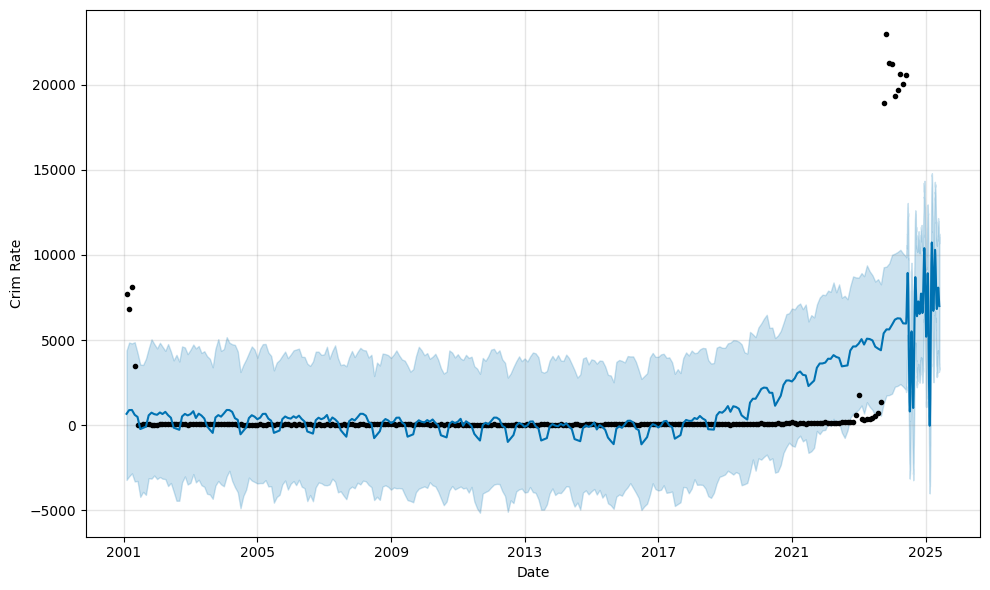

In [37]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

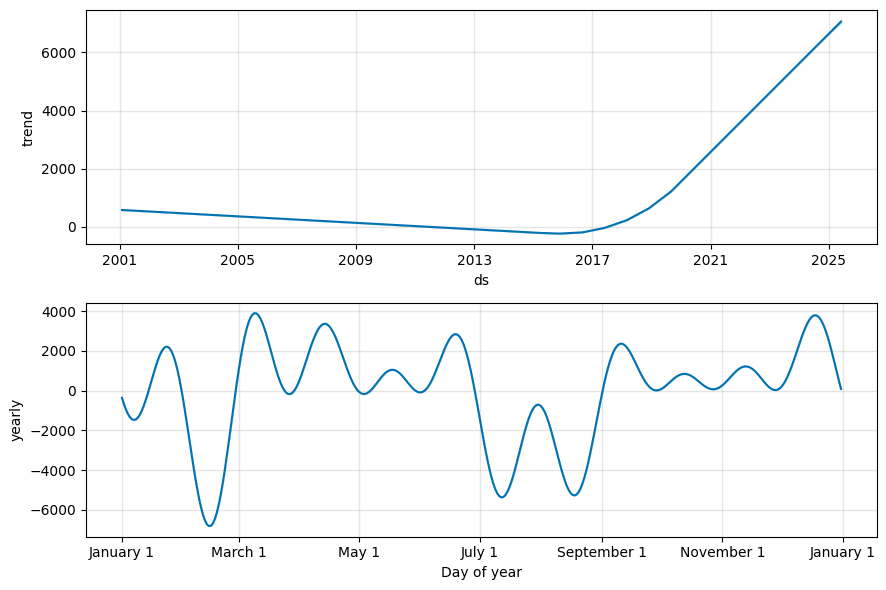

In [38]:
figure = m.plot_components(forcast)

In [39]:
future = m.make_future_dataframe(periods=720)
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,570.383719,-3253.495544,4651.412405,570.383719,570.383719,89.520143,89.520143,89.520143,89.520143,89.520143,89.520143,0.0,0.0,0.0,659.903862
1,2001-02-28,566.085521,-3197.790100,4669.364227,566.085521,566.085521,312.722128,312.722128,312.722128,312.722128,312.722128,312.722128,0.0,0.0,0.0,878.807649
2,2001-03-31,561.326801,-3003.650010,4467.288053,561.326801,561.326801,325.082423,325.082423,325.082423,325.082423,325.082423,325.082423,0.0,0.0,0.0,886.409224
3,2001-04-30,556.721589,-2895.418275,4573.122971,556.721589,556.721589,46.641389,46.641389,46.641389,46.641389,46.641389,46.641389,0.0,0.0,0.0,603.362978
4,2001-05-31,551.962869,-3233.377340,4558.850603,551.962869,551.962869,-73.361349,-73.361349,-73.361349,-73.361349,-73.361349,-73.361349,0.0,0.0,0.0,478.601520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2026-05-17,8046.316624,5153.627592,13045.181934,7939.371948,8169.618440,1033.413019,1033.413019,1033.413019,1033.413019,1033.413019,1033.413019,0.0,0.0,0.0,9079.729644
997,2026-05-18,8049.105948,5051.079669,13056.796237,7942.006703,8172.810004,1049.800578,1049.800578,1049.800578,1049.800578,1049.800578,1049.800578,0.0,0.0,0.0,9098.906526
998,2026-05-19,8051.895271,5215.675697,12986.483935,7944.644350,8176.001567,1039.528939,1039.528939,1039.528939,1039.528939,1039.528939,1039.528939,0.0,0.0,0.0,9091.424210
999,2026-05-20,8054.684594,5176.058074,12650.129872,7947.281996,8179.172929,1003.162527,1003.162527,1003.162527,1003.162527,1003.162527,1003.162527,0.0,0.0,0.0,9057.847122


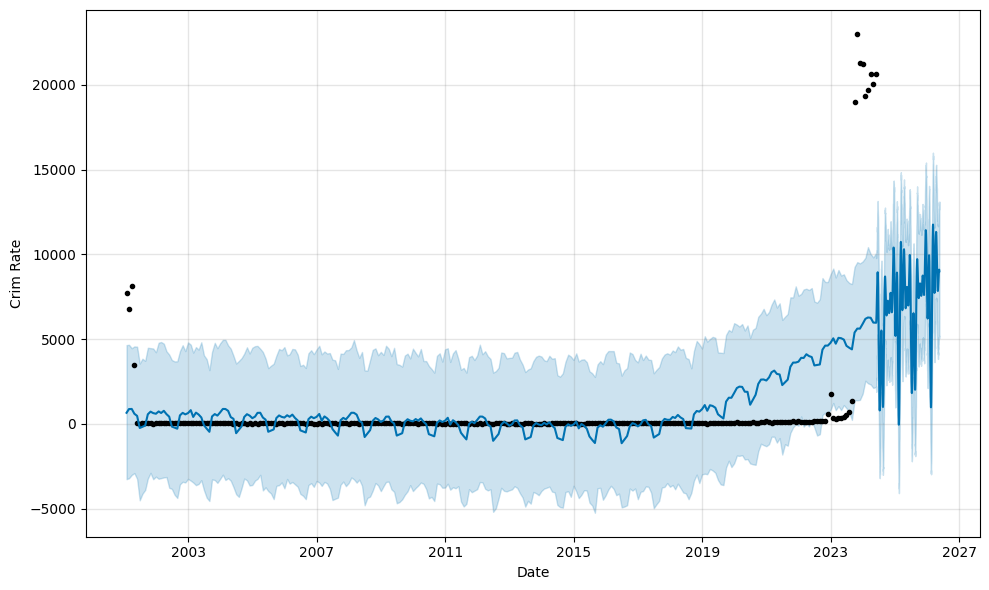

In [40]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

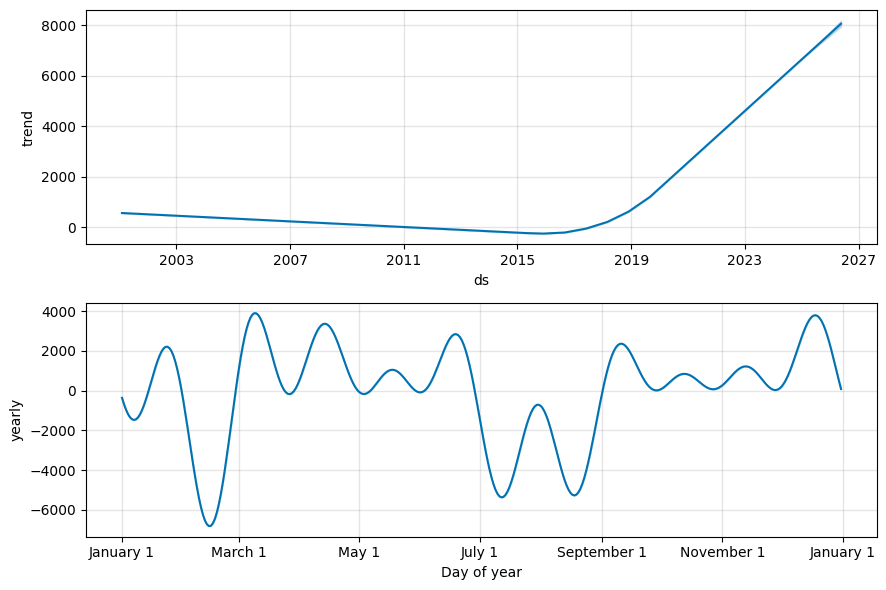

In [41]:
figure = m.plot_components(forcast)